In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv("C:\\Users\\rmith\\Downloads\\OULAD\\studentRegistration.csv")

C:\Users\rmith\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rmith\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [3]:
# Get the count of missing and null values
missing_values = df.isnull().sum()
print("\nMissing Values Count(date_unregistration = students how have not unregistered)")
print(missing_values)



Missing Values Count(date_unregistration = students how have not unregistered)
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


In [4]:
# Handling missing values
# Assuming missing date_unregistration means the student did not unregister
df['date_unregistration'].fillna('Not Unregistered', inplace=True)

C:\Users\rmith\AppData\Local\Temp\ipykernel_21000\2197503437.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_unregistration'].fillna('Not Unregistered', inplace=True)
C:\Users\rmith\AppData\Local\Temp\ipykernel_21000\2197503437.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Unregistered' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['date_unregistration'].fillna('Not Unregiste

In [5]:
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,Not Unregistered
1,AAA,2013J,28400,-53.0,Not Unregistered
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,Not Unregistered
4,AAA,2013J,32885,-176.0,Not Unregistered


In [6]:
# Convert columns to appropriate data types
df['date_registration'] = pd.to_numeric(df['date_registration'], errors='coerce')
df['date_unregistration'] = pd.to_numeric(df['date_unregistration'], errors='coerce')

In [7]:
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [8]:
# Add a column indicating if a student unregistered
df['unregistered'] = df['date_unregistration'].apply(lambda x: x if pd.notnull(x) else 0)
df['unregistered'] = df['unregistered'].apply(lambda x: 1 if x != 0 else 0)
df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,unregistered
0,AAA,2013J,11391,-159.0,NaN,0
1,AAA,2013J,28400,-53.0,NaN,0
2,AAA,2013J,30268,-92.0,12.0,1
3,AAA,2013J,31604,-52.0,NaN,0
4,AAA,2013J,32885,-176.0,NaN,0


In [9]:
# Check for outliers and inconsistencies
# Assuming valid registration dates should be within a reasonable range around the start date
registration_date_outliers = df[(df['date_registration'] < -365) | (df['date_registration'] > 365)]
unregistration_date_outliers = df[(df['date_unregistration'] < -365) | (df['date_unregistration'] > 365)]
print(registration_date_outliers)
print(unregistration_date_outliers)

Empty DataFrame
Columns: [code_module, code_presentation, id_student, date_registration, date_unregistration, unregistered]
Index: []
      code_module code_presentation  id_student  date_registration  \
25249         FFF             2013J      586851              -22.0   

       date_unregistration  unregistered  
25249                444.0             1  


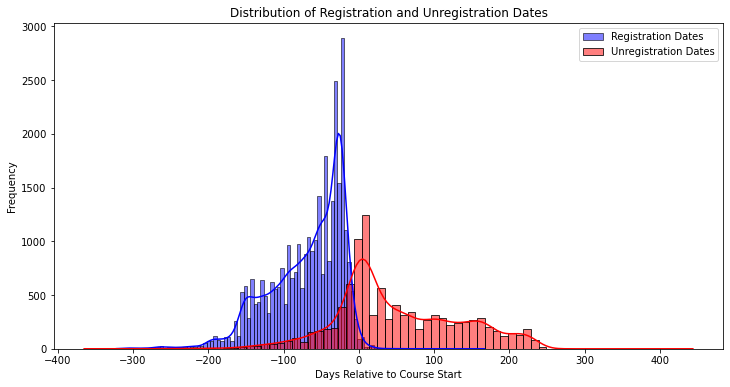

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Temporal trends
plt.figure(figsize=(12, 6))
sns.histplot(df['date_registration'], kde=True, color='blue', label='Registration Dates')
sns.histplot(df['date_unregistration'], kde=True, color='red', label='Unregistration Dates')
plt.title('Distribution of Registration and Unregistration Dates')
plt.xlabel('Days Relative to Course Start')
plt.ylabel('Frequency')
plt.legend()
plt.show()


.

